# Smartphone Sales Analysis

In this project, I performed an analysis of the smartphone market in India utilizing data found on Kaggle.com. This analysis was aimed to illuminate patterns in consumer preferences. 

Major Sections:
1. Data Retrieval
2. Data Cleaning and Exploratory Analysis
3. Statistical Analysis and Data Visualization

Insights were gained on the following topics:
1. Average sales price by brand
2. Percentage of marketshare by brand
3. Average consumer ratings by brand
4. Number of unique smartphone model offerings by brand
5. Average discount provided by brands
6. Most popular color choices by consumers

Dataset credit: Yamin Hossain
https://www.kaggle.com/datasets/yaminh/smartphone-sale-dataset?resource=download

## Section 1: Data Retrieval

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sales = pd.read_csv('Sales.csv')

In [2]:
sales.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


## Section 2: Data Cleaning and Exploratory Data Analysis

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [4]:
sales.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [5]:
print(sales.duplicated().sum())

108


In [6]:
print(sales.isnull().sum())

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64


In [7]:
#get rid of duplicated rows
sales.drop_duplicates(keep='first', inplace=True)

In [8]:
#get value counts of non-numerical columns:
print(sales['Camera'].value_counts())

Camera
Yes    3006
Name: count, dtype: int64


In [9]:
print(len(sales['Models'].unique())) #914 unique models; sparse data

914


In [10]:
print(len(sales['Mobile'].unique())) #models not meaningfully different from mobile

928


In [11]:
print(sales['Memory'].unique())

['8 GB' '2 GB' '4 GB' '4GB' '8 MB' '6 GB' '3 GB' '1.5 GB' nan '1 GB'
 '2 MB' '512 MB' '12 GB' '768 MB' '10 MB' '32 MB' '4 MB' '16 MB' '64 MB'
 '128 MB' '153 MB' '30 MB' '46 MB' '18 GB' '32 GB' '100 MB' '16 GB']


In [12]:
print(sales['Storage'].unique())

['128 GB' '16 GB' nan '64 GB' '16 MB' '512 GB' '256 GB' '32 GB' '8 GB'
 '2 MB' '4 GB' 'Expandable Upto 16 GB' '1 TB' '64 MB'
 'Expandable Upto 32 GB' '4 MB' '8 MB' '128 MB' '512 MB' '129 GB' '256 MB'
 '153 MB' '130 GB' '10 MB' '48 MB' '100 MB' '140 MB']


In [13]:
print(sales['Brands'].unique())

['SAMSUNG' 'Nokia' 'realme' 'Infinix' 'Apple' 'GIONEE' 'Xiaomi' 'OPPO'
 'vivo' 'Lenovo' 'ASUS' 'Motorola' 'HTC' 'Google Pixel' 'LG' 'POCO' 'IQOO']


In [14]:
#will drop Models and Camera columns, as these are not unique/useful for analysis
sales = sales.drop(['Camera', 'Models'], axis=1)

In [15]:
#get rid of rows with missing information
sales.dropna(inplace=True)

## Section 3: Statistical Analysis and Visualization

### Average Selling Price for Each Brand

In [16]:
#find and display average sales price of phones by brand
selling_price_avgs = sales.groupby('Brands')['Selling Price'].mean()
selling_price_avgs_df = selling_price_avgs.to_frame().reset_index()
display(selling_price_avgs_df)

,Brands,Selling Price
0,ASUS,17608.945455
1,Apple,76339.058366
2,GIONEE,7151.174603
3,Google Pixel,61391.862069
4,HTC,28314.381818
5,IQOO,37190.000000
6,Infinix,11099.466667
7,LG,19214.244898
8,Lenovo,10057.482759
9,Motorola,16240.558824


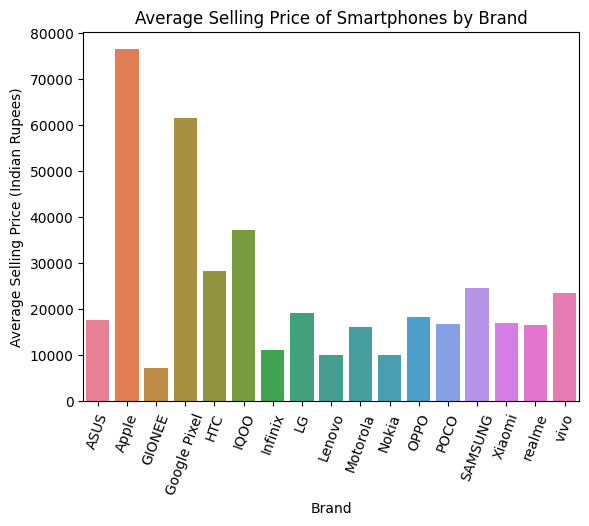

In [17]:
sns.set_palette('pastel')
sns.barplot(x='Brands', y='Selling Price', hue='Brands', data=selling_price_avgs_df)
plt.xticks(rotation=70)
plt.title('Average Selling Price of Smartphones by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price (Indian Rupees)')
plt.show()

### Brand Percentage of Marketshare

In [18]:
percentage_of_total_sales = sales.groupby('Brands')['Memory'].count()/len(sales) #get percentage of total sales by brand
percentage_of_total_sales = percentage_of_total_sales.to_frame().reset_index() #set to dataframe
percentage_of_total_sales = percentage_of_total_sales.rename(columns={'Memory':'Percentage'}) #change column name
percentage_of_total_sales = percentage_of_total_sales.sort_values('Percentage', ascending=False)

#group low-sales brands into 'other' category for visualization purposes
percentage_of_total_sales.loc[percentage_of_total_sales['Percentage']<0.04, 'Brands'] = 'Other'
total_other = percentage_of_total_sales.loc[percentage_of_total_sales['Brands'] == 'Other', 'Percentage'].sum()

percentage_of_total_sales = percentage_of_total_sales[percentage_of_total_sales['Brands']!='Other']
other_row =pd.DataFrame({'Brands': ['Other'], 'Percentage': [total_other]})

#attach newly created 'other' category to dataframe
percentage_of_total_sales = pd.concat([percentage_of_total_sales, other_row])
display(percentage_of_total_sales)


,Brands,Percentage
13,SAMSUNG,0.239843
15,realme,0.098361
1,Apple,0.091589
11,OPPO,0.088382
14,Xiaomi,0.068068
10,Nokia,0.065217
6,Infinix,0.053457
2,GIONEE,0.044904
8,Lenovo,0.041340
16,vivo,0.040627


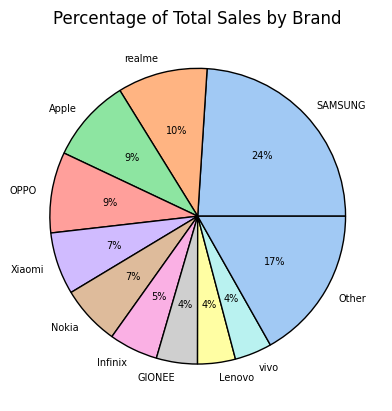

In [19]:
#display pie chart
plt.pie(percentage_of_total_sales['Percentage'], labels=percentage_of_total_sales['Brands'],
        autopct='%.0f%%', wedgeprops={'edgecolor':'black', 'linewidth':1},
        textprops={'fontsize':7})
plt.title('Percentage of Total Sales by Brand')
plt.show()

### Average Consumer Rating of Brands

In [20]:
avg_ratings = sales.groupby('Brands')['Rating'].mean().to_frame().reset_index()
display(avg_ratings)

,Brands,Rating
0,ASUS,4.080909
1,Apple,4.566537
2,GIONEE,3.850000
3,Google Pixel,4.506897
4,HTC,3.969091
5,IQOO,4.400000
6,Infinix,4.276000
7,LG,3.981633
8,Lenovo,3.970690
9,Motorola,4.142157


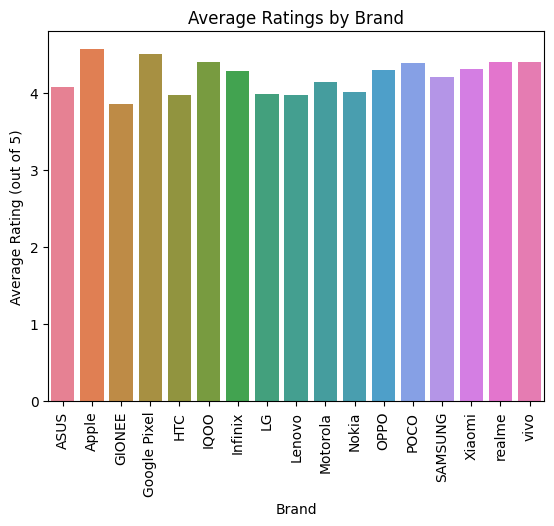

In [21]:
sns.barplot(x='Brands', y='Rating', hue = 'Brands',data=avg_ratings)
plt.xticks(rotation=90)
plt.title('Average Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating (out of 5)')
plt.show()

### Number of Unique Smartphone Offerings by Brand

In [22]:
num_models = sales.groupby('Brands')['Mobile'].nunique().to_frame().reset_index()
display(num_models)

,Brands,Mobile
0,ASUS,29
1,Apple,23
2,GIONEE,60
3,Google Pixel,11
4,HTC,29
5,IQOO,1
6,Infinix,41
7,LG,63
8,Lenovo,54
9,Motorola,50


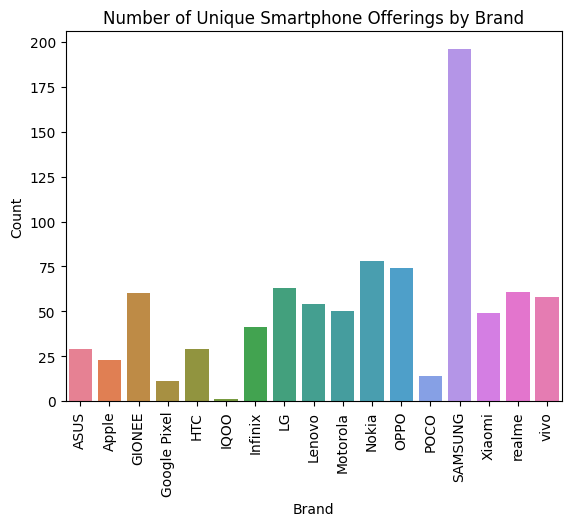

In [23]:
sns.barplot(x=num_models['Brands'], y=num_models['Mobile'],
            hue=num_models['Brands'])
plt.xticks(rotation=90)
plt.title('Number of Unique Smartphone Offerings by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

### Average Discount offered by Brand

In [24]:
avg_discounts = sales.groupby('Brands')['Discount'].mean().to_frame().reset_index()
display(avg_discounts)

,Brands,Discount
0,ASUS,968.181818
1,Apple,3623.295720
2,GIONEE,699.793651
3,Google Pixel,620.344828
4,HTC,0.000000
5,IQOO,3800.000000
6,Infinix,918.746667
7,LG,3075.663265
8,Lenovo,260.844828
9,Motorola,4313.813725


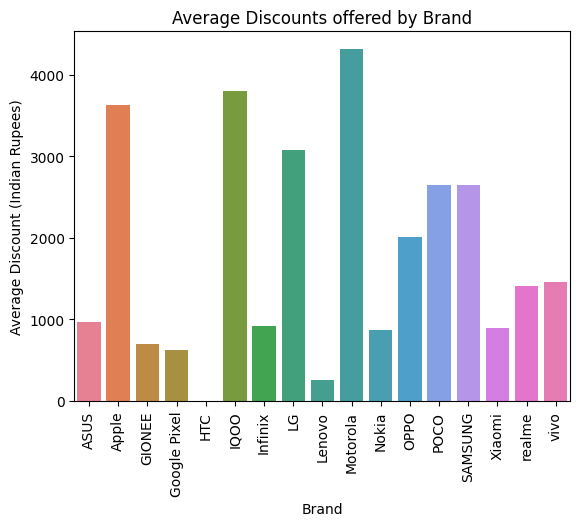

In [25]:
sns.barplot(x=avg_discounts['Brands'], y=avg_discounts['Discount'],
            hue=avg_discounts['Brands'])
plt.xticks(rotation=90)
plt.title('Average Discounts offered by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Discount (Indian Rupees)')
plt.show()

### Most Popular Colors Chosen by Consumers

In [26]:
unique_colors = sales['Colors'].str.split(' ', n=2, expand=True)
cols_lst = list(unique_colors[0]) + list(unique_colors[1]) + list(unique_colors[2])
cols_df = pd.DataFrame()
cols_df['Colors'] = cols_lst
cols_counts_df = cols_df['Colors'].value_counts().to_frame().reset_index()[:8]
cols_counts_df['count'] = cols_counts_df['count']/len(sales)
other_percentage = 1-cols_counts_df['count'].sum()
cols_counts_df.loc[len(cols_counts_df.index)] = ['Other', other_percentage]
display(cols_counts_df)

,Colors,count
0,Black,0.287954
1,Blue,0.178546
2,White,0.105845
3,Gold,0.098717
4,Silver,0.059159
5,Grey,0.047398
6,Green,0.044904
7,Red,0.044547
8,Other,0.132929


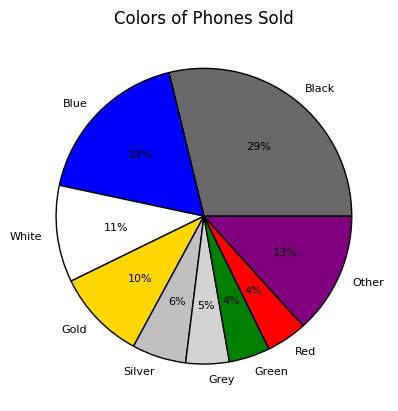

In [27]:
#display pie chart
plt.pie(cols_counts_df['count'], labels=cols_counts_df['Colors'],
        colors=['dimgrey', 'blue', 'white','gold','silver',
                'lightgrey', 'green', 'red', 'purple'],
        autopct='%.0f%%', wedgeprops={'edgecolor':'black', 'linewidth':1},
        textprops={'fontsize':8})
plt.title('Colors of Phones Sold')
plt.show()